In [1]:
import io
import itertools
import networkx as nx
import nltk
import os
import numpy as np

import matplotlib.pyplot as plt
# from rake_nltk import Rake

In [2]:
with open('sample.txt', 'r') as f:
    text = f.read().lower()

In [25]:
def filter_for_tags(tagged):
    """Apply syntactic filters based on POS tags."""
    tags=['NN', 'NNS', 'NNP', 'NNPS']
    return [item[0] for item in tagged if item[1] in tags]

In [26]:
# stopwords = nltk.corpus.stopwords.words('english')

In [27]:
# stopwords[:10]

In [28]:
sentences = nltk.sent_tokenize(text)

In [29]:
sentences[:5]

[' \npredictive modeling with deep learning is a skill that modern developers need to know.',
 'tensorflow is the premier open-source deep learning framework developed and maintained by google.',
 'although using tensorflow directly can be challenging, the modern tf.keras api beings the simplicity and ease of use of keras to the tensorflow project.',
 'using tf.keras allows you to design, fit, evaluate, and use deep learning models to make predictions in just a few lines of code.',
 'it makes common deep learning tasks, such as classification and regression predictive modeling, accessible to average developers looking to get things done.']

## Words

In [30]:
unique_word_set = set([])
edges = {}

for s in sentences:
    # tokenize the text using nltk
    word_tokens = [w for w in nltk.word_tokenize(s) if len(w) > 1]

    # assign POS tags to the words in the text
    tagged = nltk.pos_tag(word_tokens)
    word_list = filter_for_tags(tagged)
    word_list.sort()

    for word in word_list:
        if word not in unique_word_set:
            unique_word_set.add(word)

    for pair in itertools.combinations(word_list, 2):
        if pair in edges.keys():
            edges[pair] += 1
        else:
            edges[pair] = 1

In [31]:
gr = nx.Graph()  # initialize an undirected graph
gr.add_nodes_from(unique_word_set)

for key, weight in edges.items():
    gr.add_edge(key[0], key[1], weight=weight)

In [32]:
len(gr.nodes)

598

In [33]:
calculated_page_rank = nx.pagerank(gr.to_directed(), weight='weight')

In [34]:
all_keywords = sorted(calculated_page_rank, key=calculated_page_rank.get,reverse=True)

In [35]:
labels = []
scores = []
for kp in all_keywords[:50]:
    print(kp, calculated_page_rank[kp])
    labels.append(kp)
    scores.append(calculated_page_rank[kp])

model 0.04054587628656427
data 0.02085238608422332
example 0.01696862427201855
dataset 0.015940029706358307
training 0.015794262189482072
layer 0.01527567601584954
models 0.013082667679126981
loss 0.012552706795147547
test 0.012396417195924029
learning 0.011849534284791024
accuracy 0.011322656066789763
function 0.011054387896454767
number 0.008997661513173608
classification 0.008614846867464778
time 0.00843818119808686
mlp 0.0076313062679483805
output 0.007585842068453671
network 0.0074819510446718735
case 0.007224810264747832
layers 0.006793114097138444
validation 0.006517481023804811
class 0.006085096940656113
problem 0.005881032798402875
image 0.005675326307245941
input 0.005642571641339477
keras 0.005536266211976921
api 0.005504061103646484
tf.keras 0.005413466858521442
images 0.005194551527067696
list 0.004908621658575555
process 0.004826122148235884
evaluation 0.004761636138661982
performance 0.004664962826704181
use 0.004488125214613264
tensorflow 0.004152906323110374
plot 0.004

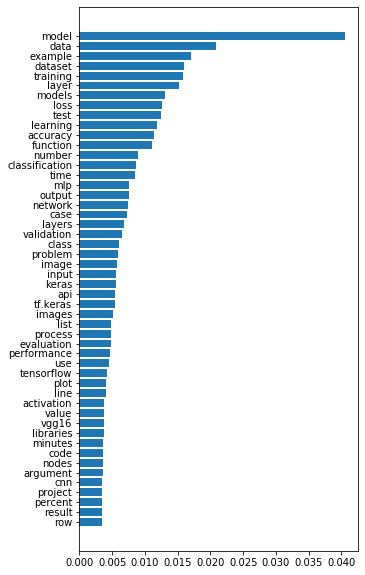

In [36]:
plt.figure(figsize=(5,10))
plt.barh(range(len(labels), 0,-1), width=scores, tick_label=labels)
plt.show()

In [37]:
np.sum([calculated_page_rank[kp] for kp in all_keywords])

1.0

## Phrases

In [38]:
word_tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(word_tokens)
textlist = [x[0] for x in tagged]
keywords = all_keywords[:len(all_keywords)//10]
phrase_freq = {}

In [39]:
def get_phrases(textlist, keywords, k=2):
    # take keyphrases with multiple words into consideration as done in the
    # paper - if two words are adjacent in the text and are selected as
    # keywords, join them together
    modified_key_phrases = set([])
    # keeps track of individual keywords that have been joined to form a keyphrase
    i = k-1
    while i < len(textlist):
        consecutive = tuple(textlist[i-k+1:i+1])
        if all([word in keywords for word in consecutive]):
            modified_key_phrases.add(consecutive)
            if consecutive in phrase_freq.keys():
                phrase_freq[consecutive] += 1
            else:
                phrase_freq[consecutive] = 1
        i += 1
        
    keyword_freq = {}
    for word in textlist:
        if word in keywords:
            if word in keyword_freq.keys():
                keyword_freq[word] += 1
            else:
                keyword_freq[word] = 1
                
    return list(modified_key_phrases), keyword_freq

In [40]:
keyphrases, freq = get_phrases(textlist, keywords, k=2)

In [41]:
keyphrases[:10]

[('use', 'code'),
 ('output', 'function'),
 ('code', 'example'),
 ('validation', 'data'),
 ('test', 'loss'),
 ('loss', 'function'),
 ('mlp', 'network'),
 ('classification', 'accuracy'),
 ('learning', 'performance'),
 ('training', 'data')]

In [42]:
# cooccur_graph = nx.DiGraph()
# cooccur_graph.add_nodes_from([(word,) for word in unique_word_set])

# phrase_dict = {1:unique_word_set}

# for phrase_len in range(2, 5):
#     keyphrases = get_phrases(textlist, all_keywords[:len(all_keywords)//3], phrase_len)
    
#     for length in range(1, phrase_len):
#         for kp in keyphrases:
#             for i in range(length, phrase_len+1):
#                 cooccur_graph.add_edge(kp[i-length:i], kp)

In [43]:
# list(cooccur_graph.successors(('deep',)))

In [44]:
# keywords = all_keywords

# cooccurrence = {}
# freq = {}
# for word in keywords:
#     cooccurrence[word] = 0
#     freq[word] = 0

# phrases = []

# for s in sentences:
#     word_tokens = nltk.word_tokenize(s)
#     for k, g in itertools.groupby(word_tokens, key=lambda x: x in keywords):
#         phrase = tuple(g)
#         if k:
#             for word in phrase:
#                 cooccurrence[word] += len(phrase)
#                 freq[word] += 1
#             phrases.append(phrase)
# #         print(k, phrase)

In [45]:
# freq

In [46]:
# score = {}
# for word in keywords:
#     score[word] = cooccurrence[word] / freq[word]
    
phrase_scores = {}
for p in keyphrases:
#     print(p)
    phrase_scores[p] = np.prod([phrase_freq[p] / freq[w] for w in p])

In [47]:
top_phrases = sorted(phrase_scores, key=phrase_scores.get, reverse=True)

In [48]:
labels = []
scores = []
for p in top_phrases[:20]:
    print(p, phrase_scores[p])
    labels.append(' '.join(p))
    scores.append(phrase_scores[p])

('activation', 'function') 0.2293906810035842
('learning', 'models') 0.08876050420168068
('training', 'process') 0.08687943262411348
('classification', 'problem') 0.07102272727272727
('rnn', 'models') 0.06722689075630252
('tf.keras', 'api') 0.06363636363636364
('training', 'dataset') 0.05780810919309514
('test', 'dataset') 0.0440251572327044
('classification', 'accuracy') 0.0427807486631016
('output', 'layer') 0.041666666666666664
('line', 'plot') 0.041666666666666664
('validation', 'dataset') 0.0362844702467344
('accuracy', 'evaluation') 0.03361344537815126
('loss', 'function') 0.033602150537634407
('model.fit', 'data') 0.030303030303030304
('dropout', 'layers') 0.018181818181818184
('keras', 'api') 0.015126050420168069
('learning', 'process') 0.013392857142857142
('image', 'classification') 0.012121212121212121
('evaluation', 'process') 0.011904761904761904


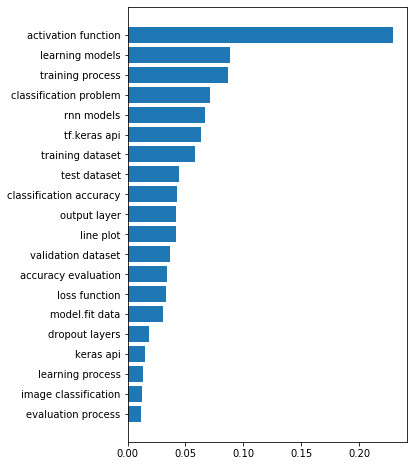

In [49]:
plt.figure(figsize=(5,8))
plt.barh(range(len(labels), 0,-1), width=scores, tick_label=labels)
plt.show()

In [53]:
for p in top_phrases[:50]:
    if all([w in keywords[:len(keywords)//3] for w in p]):
        print(' '.join(p), phrase_scores[p])

deep learning 0.46380308880308885
training dataset 0.05780810919309514
test dataset 0.0440251572327044
classification accuracy 0.0427807486631016
output layer 0.041666666666666664
loss function 0.033602150537634407
test accuracy 0.011204481792717085
test loss 0.007936507936507936
network model 0.006477732793522267
classification dataset 0.003430531732418525


## Refined TextRank

In [71]:
compound_words = top_phrases[:5]
unique_word_set = set([])
edges = {}

for s in sentences:
    # tokenize the text using nltk
    raw_word_tokens = [w for w in nltk.word_tokenize(s) if len(w) > 1]
    tagged = nltk.pos_tag(raw_word_tokens)
    word_tokens = filter_for_tags(tagged)
    
    word_list = []
    i = 0
    while i < len(word_tokens) - 1:
        if (word_tokens[i], word_tokens[i+1]) in compound_words:
            word_list.append(word_tokens[i] + ' ' + word_tokens[i+1])
            i += 2
        else:
            word_list.append(word_tokens[i])
            i += 1
    
    word_list.sort()

    for word in word_list:
        if word not in unique_word_set:
            unique_word_set.add(word)

    for pair in itertools.combinations(word_list, 2):
        if pair in edges.keys():
            edges[pair] += 1
        else:
            edges[pair] = 1

In [72]:
gr = nx.Graph()  # initialize an undirected graph
gr.add_nodes_from(unique_word_set)

for key, weight in edges.items():
    gr.add_edge(key[0], key[1], weight=weight)

In [73]:
len(gr.nodes)

554

In [74]:
calculated_page_rank = nx.pagerank(gr.to_directed(), weight='weight')

In [75]:
all_keywords = sorted(calculated_page_rank, key=calculated_page_rank.get,reverse=True)

In [76]:
labels = []
scores = []
for kp in all_keywords[:50]:
    print(kp, calculated_page_rank[kp])
    labels.append(kp)
    scores.append(calculated_page_rank[kp])

model 0.03611287415042358
example 0.015881337592093887
training 0.015372206688148166
loss 0.014677249112602944
layer 0.014439648475633988
test 0.013667097933872979
accuracy 0.013043468724959175
such 0.012576483938505337
deep learning 0.011521880290772247
tensorflow 0.011167385887898383
dataset 0.010475221064477208
number 0.008768545107101147
api 0.00843708741299231
tutorial 0.008370692714194449
mlp 0.008169448068862625
output 0.007301836923437915
time 0.007187351681812165
class 0.006594034845842476
new 0.006482628249473155
case 0.006392495867076168
validation 0.006087264941055861
function 0.005966361490759654
input 0.005528991077622681
first 0.005368932136980509
problem 0.005067271731568196
network 0.005005081919988274
classification 0.004940208460503793
performance 0.004892075575829472
vgg16 0.004880513173859706
image 0.004693300072756554
print 0.004438119810996175
batch 0.004431340615699698
line 0.004393931039199761
activation function 0.0043026973684442095
list 0.004298157093903526


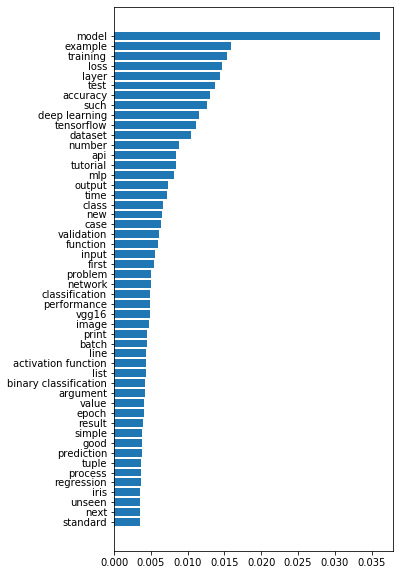

In [78]:
plt.figure(figsize=(5,10))
plt.barh(range(len(labels), 0,-1), width=scores, tick_label=labels)
plt.show()